# Open Parking and Camera Violations Analysis Project - Fall 2024

### Questions we plan to answe with our analysis:
- Which license type received the most tickets/accidents? - DK
- What are the top 5 violations and their corresponding fine amounts? - DK
- How are the top 5 violations distributed among the top 5 licenses with most offenses? - DI & DK
- Which county received the most tickets? - RK
- Which issuing agency gives the most violation tickets? - BG
- Which day of the week has the most violations? - DI
- How do fine amounts vary across issuing agencies and violations? - DI

## Import Libraries and the API request code

In [15]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
#enable inline plotting
%matplotlib inline 
import numpy as np
import requests
import seaborn as sns


In [3]:
#make the api request for traffic violation data
try:
    #Define the API URL and the date filter parameters
    api_url = 'https://data.cityofnewyork.us/resource/nc67-uf89.json'
    rows = 1000000
    offset = 0 
    params = {
        '$offset': offset,
        '$limit': rows
    }
    response = requests.get(api_url, params=params)
    response.raise_for_status()  # Raise an error for failed requests
    data = response.json()

    if not data:
        print("No data returned. The filter might be incorrect or unsupported.")
    else:
       df = pd.DataFrame(data)
       display(df.head())
        
#cast errors
except requests.exceptions.RequestException as req_err:
    print(f"A request error occurred: {req_err}")
    print(response.text)  # Print response text for further debugging

except Exception as err:
    print(f"A general error occurred: {err}")
df.shape


#this section of code had been commented out for consistency of output


,plate,state,license_type,summons_number,issue_date,violation_time,violation,fine_amount,penalty_amount,interest_amount,reduction_amount,payment_amount,amount_due,precinct,county,issuing_agency,summons_image,violation_status,judgment_entry_date
0,DX0092,IA,PAS,8691101477,08/15/2018,10:37A,NO STOPPING-DAY/TIME LIMITS,115,0,0,0,115,0,001,NY,TRAFFIC,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,NaN,NaN
1,182493R,NJ,PAS,1443266670,08/17/2018,09:55A,NO PARKING-STREET CLEANING,45,0,0,0,45,0,034,NY,DEPARTMENT OF SANITATION,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,NaN,NaN
2,HUY8163,NY,PAS,8691453357,08/16/2018,06:58A,NO PARKING-DAY/TIME LIMITS,65,0,0,0,65,0,006,NY,TRAFFIC,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,NaN,NaN
3,C85CPR,NJ,PAS,7598469740,06/21/2016,08:25A,NO STANDING-EXC. TRUCK LOADING,95,10,0,0,105,0,010,NY,TRAFFIC,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,NaN,NaN
4,GHG9651,NY,PAS,7699179237,01/29/2016,01:54P,REG. STICKER-EXPIRED/MISSING,65,30,0,0,95,0,061,K,TRAFFIC,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,HEARING HELD-GUILTY,NaN


(1000000, 19)

In [5]:
save data from the api request into a csv file 
df.to_csv('gr5data.csv',index=False)

SyntaxError: invalid syntax (2398373276.py, line 1)

## Import and clean data

In [17]:
#read the csv file for further data manipulation
df_data=pd.read_csv('gr5data.csv')
#display(df_data) #check output

In [18]:
#create a copy of the original dataframe to work on
#to preserve the original just in case
df2=df_data.copy()
#display the data
display(df2.head(20))

,plate,state,license_type,summons_number,issue_date,violation_time,violation,fine_amount,penalty_amount,interest_amount,reduction_amount,payment_amount,amount_due,precinct,county,issuing_agency,summons_image,judgment_entry_date,violation_status
0,D44PKZ,NJ,PAS,4804282543,10/01/2022,09:16P,PHTO SCHOOL ZN SPEED VIOLATION,50.0,0.0,0.00,0.00,50.00,0.0,0.0,BK,DEPARTMENT OF TRANSPORTATION,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,NaN,NaN
1,JKJ9126,NY,PAS,8818766326,08/11/2020,04:28P,NO STANDING-DAY/TIME LIMITS,115.0,60.0,1.08,0.39,175.69,0.0,71.0,K,TRAFFIC,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,07/28/2022,NaN
2,EWM4319,NY,PAS,8666769634,07/01/2022,11:44A,FAIL TO DSPLY MUNI METER RECPT,35.0,10.0,0.00,45.00,0.00,0.0,66.0,K,TRAFFIC,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,NaN,HEARING HELD-NOT GUILTY
3,T780530C,NY,OMT,8989777940,08/25/2021,12:06P,NO PARKING-STREET CLEANING,65.0,0.0,0.00,0.00,65.00,0.0,84.0,K,TRAFFIC,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,NaN,NaN
4,KKE3228,NY,PAS,8666769610,07/01/2022,11:33A,INSP. STICKER-EXPIRED/MISSING,65.0,10.0,0.00,0.00,75.00,0.0,66.0,K,TRAFFIC,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,NaN,NaN
5,HZJ8377,NY,PAS,8989777963,08/25/2021,12:12P,NO PARKING-STREET CLEANING,65.0,0.0,0.00,0.00,65.00,0.0,84.0,K,TRAFFIC,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,NaN,NaN
6,BRESLEV7,NY,SRF,8666769646,07/01/2022,11:51A,REG. STICKER-EXPIRED/MISSING,65.0,10.0,0.00,0.00,75.00,0.0,66.0,K,TRAFFIC,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,NaN,NaN
7,Y142TH,NY,PAS,4806966733,10/06/2022,04:17P,PHTO SCHOOL ZN SPEED VIOLATION,50.0,0.0,0.00,0.00,50.00,0.0,0.0,ST,DEPARTMENT OF TRANSPORTATION,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,NaN,NaN
8,63309NA,NY,COM,8989778189,08/26/2021,10:54A,NO STANDING-DAY/TIME LIMITS,115.0,0.0,0.00,15.00,100.00,0.0,84.0,K,TRAFFIC,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,NaN,HEARING HELD-GUILTY REDUCTION
9,54498MN,NY,COM,8989777938,08/25/2021,11:52A,NON-COMPLIANCE W/ POSTED SIGN,60.0,0.0,0.00,35.00,25.00,0.0,84.0,K,TRAFFIC,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,NaN,HEARING HELD-GUILTY REDUCTION


In [21]:
#drop unnecessary columns
df2.drop(['plate','summons_image','violation_status','judgment_entry_date'], axis=1, inplace=True)
#print(df2)
df2.rename(columns={'state':'registration_state'}, inplace=True) #rename ambiguous columns
df2.dropna(inplace=True) #drop rows with null values
display(df2)

,registration_state,license_type,summons_number,issue_date,violation_time,violation,fine_amount,penalty_amount,interest_amount,reduction_amount,payment_amount,amount_due,precinct,county,issuing_agency
0,NJ,PAS,4804282543,10/01/2022,09:16P,PHTO SCHOOL ZN SPEED VIOLATION,50.0,0.0,0.00,0.00,50.00,0.0,0.0,BK,DEPARTMENT OF TRANSPORTATION
1,NY,PAS,8818766326,08/11/2020,04:28P,NO STANDING-DAY/TIME LIMITS,115.0,60.0,1.08,0.39,175.69,0.0,71.0,K,TRAFFIC
2,NY,PAS,8666769634,07/01/2022,11:44A,FAIL TO DSPLY MUNI METER RECPT,35.0,10.0,0.00,45.00,0.00,0.0,66.0,K,TRAFFIC
3,NY,OMT,8989777940,08/25/2021,12:06P,NO PARKING-STREET CLEANING,65.0,0.0,0.00,0.00,65.00,0.0,84.0,K,TRAFFIC
4,NY,PAS,8666769610,07/01/2022,11:33A,INSP. STICKER-EXPIRED/MISSING,65.0,10.0,0.00,0.00,75.00,0.0,66.0,K,TRAFFIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,FL,PAS,8913475297,05/21/2021,01:03P,NO STANDING-DAY/TIME LIMITS,115.0,0.0,0.00,0.00,115.00,0.0,10.0,NY,TRAFFIC
999996,NY,PAS,4835933722,04/13/2023,10:09A,PHTO SCHOOL ZN SPEED VIOLATION,50.0,0.0,0.00,0.00,50.00,0.0,0.0,BK,DEPARTMENT OF TRANSPORTATION
999997,NY,PAS,9129368315,05/30/2024,01:04P,DOUBLE PARKING,115.0,0.0,0.00,0.00,115.00,0.0,19.0,NY,TRAFFIC
999998,NY,PAS,8983547510,11/23/2021,01:07P,FAIL TO DSPLY MUNI METER RECPT,35.0,0.0,0.00,35.00,0.00,0.0,70.0,K,TRAFFIC


In [23]:
df2.isnull().sum() #make sure there are no null values

registration_state    0
license_type          0
summons_number        0
issue_date            0
violation_time        0
violation             0
fine_amount           0
penalty_amount        0
interest_amount       0
reduction_amount      0
payment_amount        0
amount_due            0
precinct              0
county                0
issuing_agency        0
dtype: int64

In [25]:
df2.head(20) #display the top 20 rows of the cleaned dataframe

,registration_state,license_type,summons_number,issue_date,violation_time,violation,fine_amount,penalty_amount,interest_amount,reduction_amount,payment_amount,amount_due,precinct,county,issuing_agency
0,NJ,PAS,4804282543,10/01/2022,09:16P,PHTO SCHOOL ZN SPEED VIOLATION,50.0,0.0,0.00,0.00,50.00,0.0,0.0,BK,DEPARTMENT OF TRANSPORTATION
1,NY,PAS,8818766326,08/11/2020,04:28P,NO STANDING-DAY/TIME LIMITS,115.0,60.0,1.08,0.39,175.69,0.0,71.0,K,TRAFFIC
2,NY,PAS,8666769634,07/01/2022,11:44A,FAIL TO DSPLY MUNI METER RECPT,35.0,10.0,0.00,45.00,0.00,0.0,66.0,K,TRAFFIC
3,NY,OMT,8989777940,08/25/2021,12:06P,NO PARKING-STREET CLEANING,65.0,0.0,0.00,0.00,65.00,0.0,84.0,K,TRAFFIC
4,NY,PAS,8666769610,07/01/2022,11:33A,INSP. STICKER-EXPIRED/MISSING,65.0,10.0,0.00,0.00,75.00,0.0,66.0,K,TRAFFIC
5,NY,PAS,8989777963,08/25/2021,12:12P,NO PARKING-STREET CLEANING,65.0,0.0,0.00,0.00,65.00,0.0,84.0,K,TRAFFIC
6,NY,SRF,8666769646,07/01/2022,11:51A,REG. STICKER-EXPIRED/MISSING,65.0,10.0,0.00,0.00,75.00,0.0,66.0,K,TRAFFIC
7,NY,PAS,4806966733,10/06/2022,04:17P,PHTO SCHOOL ZN SPEED VIOLATION,50.0,0.0,0.00,0.00,50.00,0.0,0.0,ST,DEPARTMENT OF TRANSPORTATION
8,NY,COM,8989778189,08/26/2021,10:54A,NO STANDING-DAY/TIME LIMITS,115.0,0.0,0.00,15.00,100.00,0.0,84.0,K,TRAFFIC
9,NY,COM,8989777938,08/25/2021,11:52A,NON-COMPLIANCE W/ POSTED SIGN,60.0,0.0,0.00,35.00,25.00,0.0,84.0,K,TRAFFIC


In [27]:
null_summary = df2.isna().sum()
print(null_summary)

registration_state    0
license_type          0
summons_number        0
issue_date            0
violation_time        0
violation             0
fine_amount           0
penalty_amount        0
interest_amount       0
reduction_amount      0
payment_amount        0
amount_due            0
precinct              0
county                0
issuing_agency        0
dtype: int64


In [29]:
#customize palette and style
sns.set_style('darkgrid')
sns.set_palette("Set2")

## Which license types have the most violations?

   license_type   count
47          PAS  781877
15          COM   90473
43          OMT   34798
57          SRF   11509
42          OMS   10140


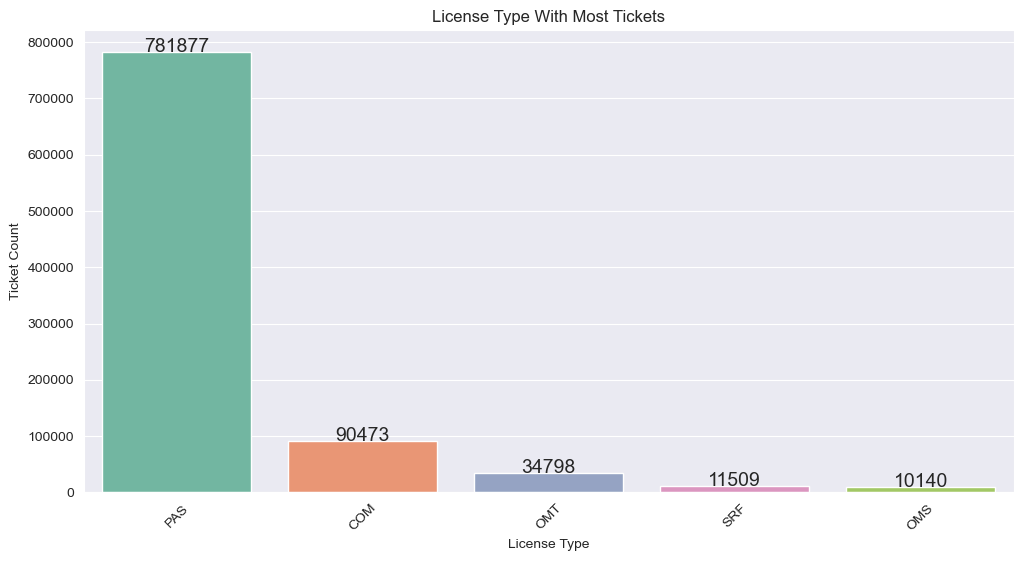

In [32]:
#group the DF by license type
df2_license_grouped=df2.groupby('license_type').size().reset_index(name='count')
#display(df2_license_violation_grouped) #check output

#find the top 5 license types with most violations overall
df2_license_grouped=df2_license_grouped.nlargest(5,'count')
print(df2_license_grouped) #check output

#create a bar plot showint the top 5 license types with most violations
plt.figure(figsize=(12, 6))
sns.barplot(x='license_type', y='count', data=df2_license_grouped, hue='license_type')

#add value labels to bars
for index, value in enumerate(df2_license_grouped['count']):
    plt.text(index, value+0.1, str(value),ha='center', fontsize=14)

#customize the plot with title and axis labels
plt.title('License Type With Most Tickets')
plt.xlabel('License Type')
plt.ylabel('Ticket Count')
plt.xticks(rotation=45)
#savethe plot
plt.savefig('license_type_with_most_tickets.png')
#show the plot
plt.show()


##### Discussion:
As you can see in the graph above, the top 5 license types with most violations are PAS , COM, OMT, SRF, OMS. 
- PAS - passenger vehicle (non-commercial)
- COM - commercial vehicle (e.g., trucks, delivery vans, taxis)
- OMT - Stand By Vehicle (e.g,taxi & limousine commissions)
- SRF - Personalized Plates (e.g., cars, mini-vans, SUVs etc.)
- OMS - Special Omnibus Rentals

The personal passenger vehicles (PAS) have a drastically higher ticket count than other license types with 781,877 violations, followed by commercial vehicles with 90,473 violations, followed by taxis and limousines with 34,798 violations, and vehicles with personalized plates and special omnibus rentals with 11,509 and 10,140 violations respectively.

Does that mean that passenger vehicles have more reckless drivers?
- Not necessarily. Perhaps, there are just way more PAS vehicles on the road than commercial, public transport, and rental type vehicles. But, unfortunately, this data was not available to us.

## What are the top 5 violations and their corresponding fine amounts?

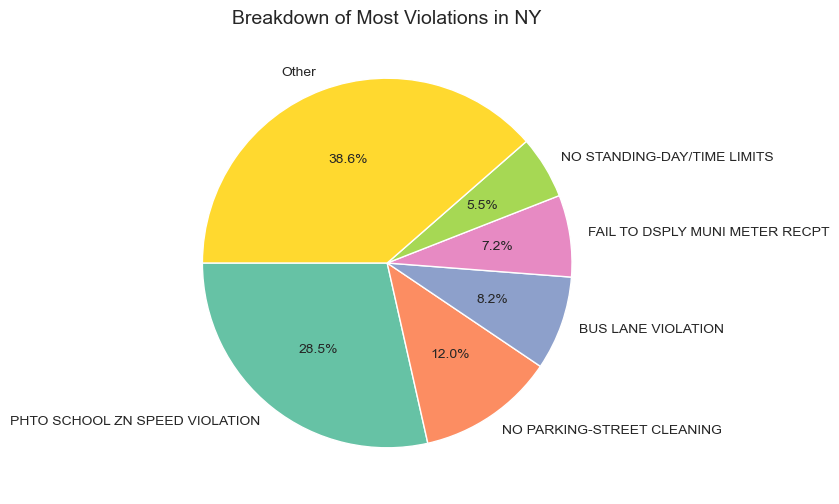

In [36]:
#Gets count of all violations
violation_count = df2['violation'].value_counts()
#Top 5 violations in the series
top_5_violations = violation_count[:5]
#Combine all other violations to one using sum on the series of violations past the first 5
other_count = violation_count[5:].sum()
#Combine top 5 and other violations into one series using pd.concat
violation_5_counts = pd.concat([top_5_violations, pd.Series({'Other': other_count})])
#Plot the pie chart
plt.figure(figsize=(12, 6))  # Set figure size
plt.pie(
    violation_5_counts, 
    labels=violation_5_counts.index, 
    autopct='%1.1f%%', 
    startangle=180, 
)
plt.title('Breakdown of Most Violations in NY', fontsize=14)
plt.show()

                        violation  fine_amount   count
0  PHTO SCHOOL ZN SPEED VIOLATION         50.0  271523
1      NO PARKING-STREET CLEANING         65.0  113386
2              BUS LANE VIOLATION         50.0   59014
3  FAIL TO DSPLY MUNI METER RECPT         35.0   55839
4     NO STANDING-DAY/TIME LIMITS        115.0   52215


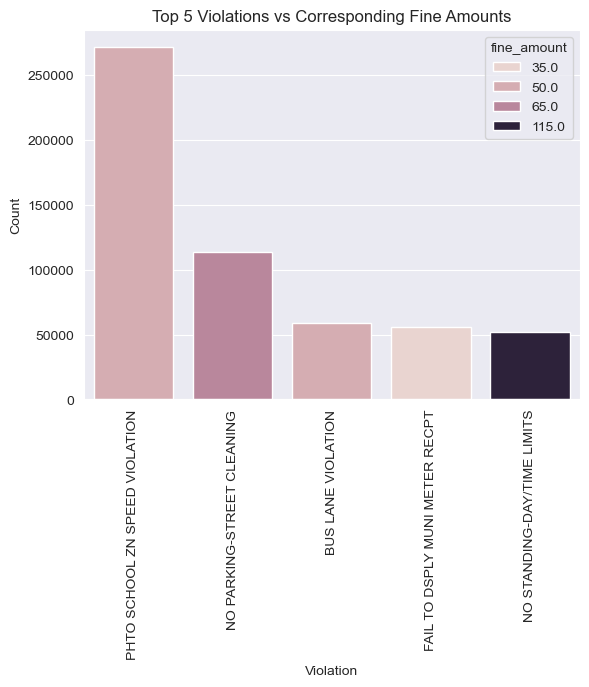

In [38]:
#violations vs fine amount

#group by violation and fine amount
df2_violation_fine_amount_grouped=df2.groupby(['violation','fine_amount']).size().reset_index(name='count')

#find top 5 violations
top_5_violations = df2_violation_fine_amount_grouped.nlargest(5, 'count').reset_index(drop=True)
print(top_5_violations) #check output

#make the bar plot
sns.barplot(x='violation',y='count',hue='fine_amount', data=top_5_violations)

#customize the plot with title and axis labels
plt.title('Top 5 Violations vs Corresponding Fine Amounts')
plt.ylabel('Count')
plt.xlabel('Violation')
plt.xticks(rotation = 90, fontsize = 10)

#save the figure
plt.savefig('Top 5 Violations vs Corresponding Fine Amounts.png')
#show the plot
plt.show()


##### The top 5 overall violations are:
- Photo school zone speed violations with the fine amount of $50
- No parking - street cleaning with the fine amount of $65
- Bus lane violations $50
- Fail to display muni meter receipt (muni meter receipt refers to the parking meter receipt) with the fine amount of $35
- No standing - day time limits with the fine amount of $115

So, as you can see, the most common violations are not necessarily the most expensive. In fact, the most expensive among the top 5 most common violations (no standing - day time limits) is the least common. 

However, the fee amounts also do not decrease with the amount of violations per category.

What does that mean?
- It is reasonable to infer that there is no apparent correlation between the fine amount and reduction in violations. In other words, a rudimentary increase in the fees will not necessarily reduce the prevalence of a given violation. In our opinion, the price increase might have to be drastic to be effective.


## How are the top 5 violations distributed per top 5 licenses?

<Figure size 1200x600 with 0 Axes>

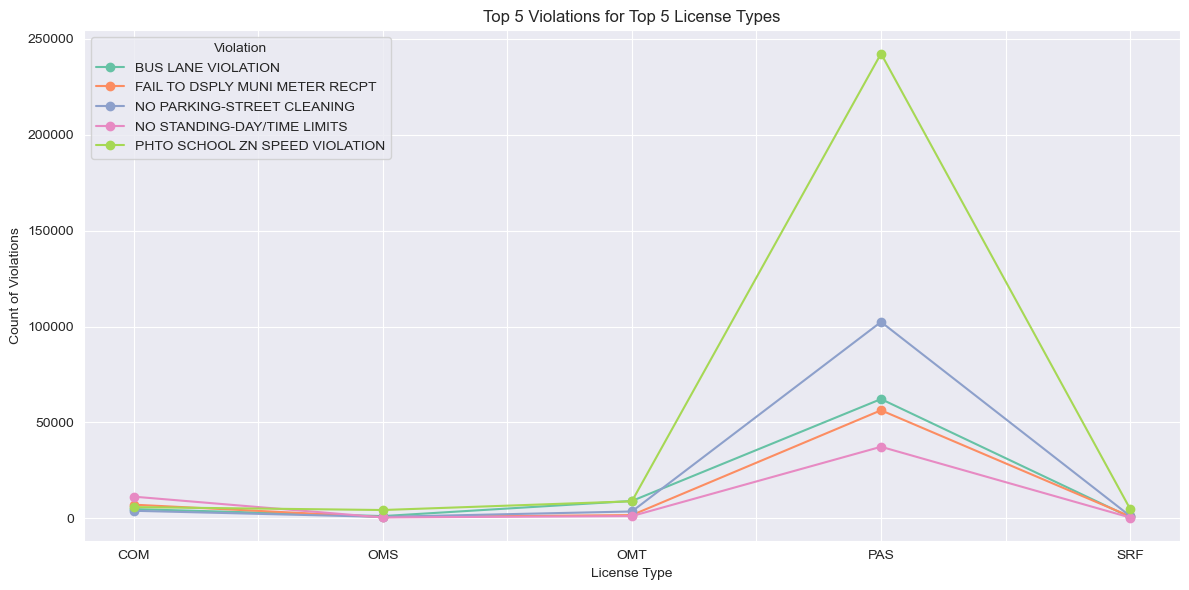

In [42]:
# group license and violation
df2_license_violation_grouped= df2.groupby(['license_type', 'violation']).size().reset_index(name='count')
top_5_licenses = (df2_license_violation_grouped.groupby('license_type')['count'].sum().nlargest(5).index)

# filter license type
filtered_data = df2_license_violation_grouped[df2_license_violation_grouped['license_type'].isin(top_5_licenses)]

# top 5 violations
top_5_violations = (filtered_data.groupby('violation')['count'].sum().nlargest(5).index)

# filter violations
filtered_data = filtered_data[filtered_data['violation'].isin(top_5_violations)]

# sort
top_violations_per_license = (filtered_data.sort_values(['license_type', 'count'], ascending=[True, False]).groupby('license_type').head(5))
#print(top_violations_per_license) #check output #

# pivot table for the heatmap
lineplot_data = top_violations_per_license.pivot_table(
    index='license_type', 
    columns='violation', 
    values='count'
).fillna(0)


# Plot the pivot table as a line plot
plt.figure(figsize=(12, 6))
lineplot_data.plot(kind='line', marker='o', linestyle='-', figsize=(12, 6))

# Add plot details
plt.title('Top 5 Violations for Top 5 License Types')
plt.xlabel('License Type')
plt.ylabel('Count of Violations')
plt.legend(title='Violation')
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('Top 5 Violations for Top 5 License Types (line plot).png')

# Display the plot
plt.show()

In [43]:
#print the data about top violations per top 5 license
indexed_top_violations_per_license=top_violations_per_license.set_index(['license_type','violation'])
print(indexed_top_violations_per_license)

                                              count
license_type violation                             
COM          NO STANDING-DAY/TIME LIMITS      11278
             FAIL TO DSPLY MUNI METER RECPT    7094
             PHTO SCHOOL ZN SPEED VIOLATION    5824
             BUS LANE VIOLATION                4782
             NO PARKING-STREET CLEANING        3905
OMS          PHTO SCHOOL ZN SPEED VIOLATION    4301
             BUS LANE VIOLATION                1134
             NO PARKING-STREET CLEANING         717
             FAIL TO DSPLY MUNI METER RECPT     613
             NO STANDING-DAY/TIME LIMITS        424
OMT          BUS LANE VIOLATION                9024
             PHTO SCHOOL ZN SPEED VIOLATION    8860
             NO PARKING-STREET CLEANING        3550
             FAIL TO DSPLY MUNI METER RECPT    1658
             NO STANDING-DAY/TIME LIMITS       1143
PAS          PHTO SCHOOL ZN SPEED VIOLATION  242380
             NO PARKING-STREET CLEANING      102405
            

As you can see, although the top 5 violations are in the order shown in the previous bar chart, they are distributed differently among the top 5 license types.

It is interesting to see the difference in prevailing violations per license type.
For instance, passenger vehicles (PAS) get a lot of speed violations in school zones (perhaps rushing to drop their kids off at school), while taxis and limousines (OMT) get mostly bus lane violation tickets (perhaps picking up or dropping off their customers).

How is this useful?
- Hypothetically, this data could be used to make targeted marketing campaign to encourage each group of drivers to drive safer.

## How do fine amounts vary across issuing agencies and violations?

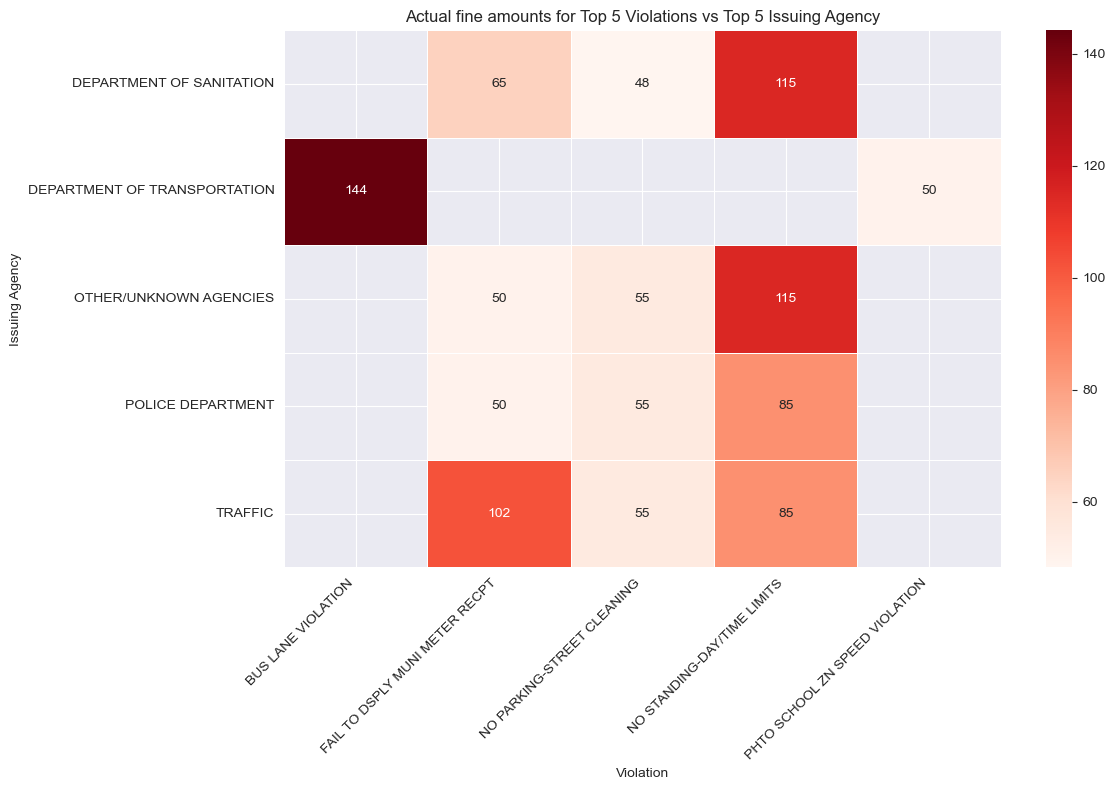

In [48]:
#"How do fine amounts vary across issuing agencies and violations?" X-axis: violation, Y-axis: license_type, Heatmap values: fine_amount

# fine amount to numeric values from object value
df2['fine_amount'] = pd.to_numeric(df2['fine_amount'])

# groupby and filter
df2_grouped = df2.groupby(['issuing_agency', 'violation', 'fine_amount']).size().reset_index(name='count')
top_5_violations = (df2_grouped.groupby('violation')['count'].sum().nlargest(5).index)


df2_grouped = df2_grouped[df2_grouped['violation'].isin(top_5_violations)]
top_5_issuing_agencies = (df2_grouped.groupby('issuing_agency')['count'].sum().nlargest(5).index)
df2_grouped = df2_grouped[df2_grouped['issuing_agency'].isin(top_5_issuing_agencies)]

#pivot
heatmap_data = df2_grouped.pivot_table(index='issuing_agency', columns='violation', values='fine_amount')


# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5)
plt.title('Actual fine amounts for Top 5 Violations vs Top 5 Issuing Agency')
plt.xlabel('Violation')
plt.ylabel('Issuing Agency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


As we can see from the heatmap sometimes the amount of violation fee might change depending on the issuing agency. For example, as we can see the "No standing -day/time limits violation fee amount varies significantly by the department of Sanitation charging 115$ meanwhile the police department and traffic agency provide a lesser fee of 85$.

There's another violation which is "Fail to display muni meter receipt" where the traffic issuing agency charges more than other agencies. So in this heatmap visualization, we can see that sometimes depending on the issuing agency the fee amount changes.

## Which county recieved the most tickets?

Kings
295016
  county   count
0  Kings  295016
1    QNS  275540
2     NY  232931
3  Bronx  113847
4   Rich   34447


/var/folders/61/5x63275967v0x49dtn1b13_r0000gn/T/ipykernel_20050/172308479.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ticket_count , x='county', y='count', palette='viridis')


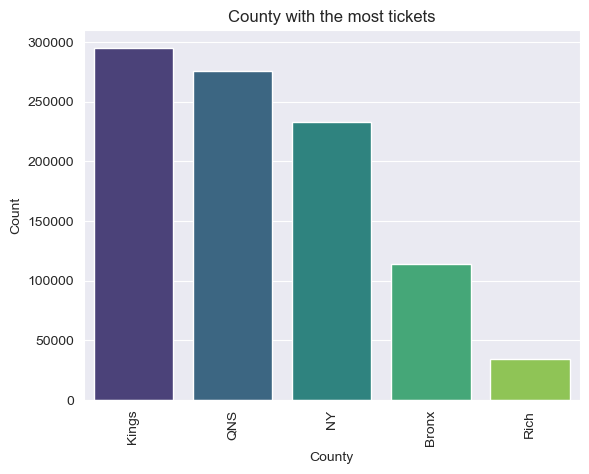

In [53]:
#Pie Chart Change
def organize_county(county):
    if 'qns' in county.lower() or 'qn' in county.lower() or 'q' in county.lower():
        return 'QNS'
    elif 'bx' in county.lower() or 'bronx' in county.lower():
        return 'Bronx'
    elif 'rich' in county.lower() or 'r' in county.lower() or 'st' in county.lower():
        return 'Rich'
    elif 'kings' in county.lower() or 'k' in county.lower() or 'bk' in county.lower():
        return 'Kings'
    elif 'ny' in county.lower() or 'mn' in county.lower():
        return 'NY'
    else:
        return county


df2['county'] = df2['county'].apply(organize_county)


#Count number of times each county appears in the county column
ticket_count = df2['county'].value_counts().reset_index()
#Find the index of county with the most ticket counts
leading_county = ticket_count['county'][ticket_count['count'].idxmax()]
#Find the highest ticket count
leading_count = ticket_count['count'].max()


#plot the bar chart for ticket count
sns.barplot(data=ticket_count , x='county', y='count', palette='viridis')
plt.title('County with the most tickets')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=90)
print(leading_county)
print(leading_count)
print(ticket_count)

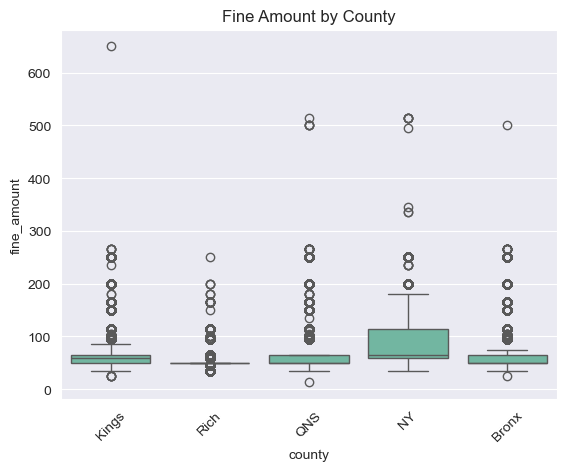

Outlier for Kings county is:WEIGH IN MOTION VIOLATION that costs: 650.0


In [55]:
#Fine amount by county
sns.boxplot(x='county', y='fine_amount',data=df2)
plt.title('Fine Amount by County')
plt.xticks(rotation=45)
plt.show()
kings_data = df2[df2['county'] == 'Kings']
max_fine = kings_data.loc[kings_data['fine_amount'].idxmax()]
violation = max_fine['violation']
cost = max_fine['fine_amount']
print(f"Outlier for Kings county is:{violation} that costs: {cost}")

## Which issuing agency gives the most violation tickets?

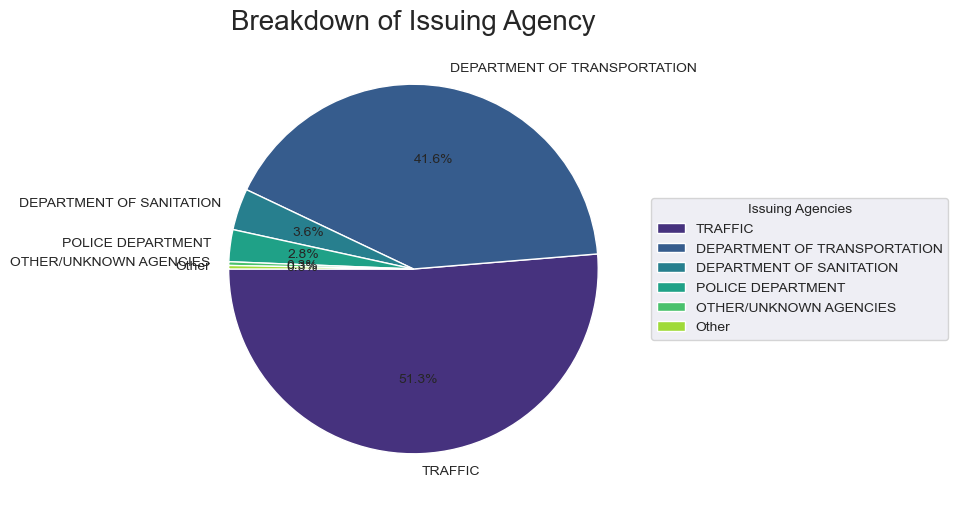

In [58]:
#Pie chart with a legend 
issuing_agency_count = df2['issuing_agency'].value_counts()

# focus on the top 5 of the series
top_5_violations = issuing_agency_count[:5]

# Combine all other agencies into the category "Other"
other_count = issuing_agency_count[5:].sum()

# The final Series (after 'Other' is added)
issuing_agency_count = pd.concat([top_5_violations, pd.Series({'Other': other_count})
])

# Plotting the pie chart 
plt.figure(figsize=(12, 6))  

# Ensures that it would read each slice of the data and when creating the legend
wedges, texts, autotexts = plt.pie(issuing_agency_count,labels=issuing_agency_count.index,autopct='%1.1f%%',startangle=180,colors=sns.color_palette("viridis")
)

plt.title('Breakdown of Issuing Agency', fontsize=20)
# Adjusting the legend keys
plt.legend(wedges, issuing_agency_count.index, title="Issuing Agencies", loc="center left", bbox_to_anchor=(1, 0, 1, 1))

plt.title('Breakdown of Issuing Agency', fontsize=20)
# autopct='%1.1f%%' allows to display the % of each slice


plt.show()

As seen from the breakdown, the Traffic agency causes  the majority of violations being 51.3%.  The second largest contributing nearly half of the violations is the Department of Transportation, being 41.6%. Within both of these categories they contribute 92.9%. This could indicate that most of the enforcement contributes in transportation issues 

As for smaller shares that contributes in total of 6.9% are: 

- Department of Sanitation: 3.6% 

- Police Department: 2.8% 

- Other/Unkown agencies: 0.2% 

- other : 0.3%

Although the percentage of the small shares have minimal involvement, it may occur less frequently due to enforced violations. But is important to notice if any changes are being made that can help enforced violations.

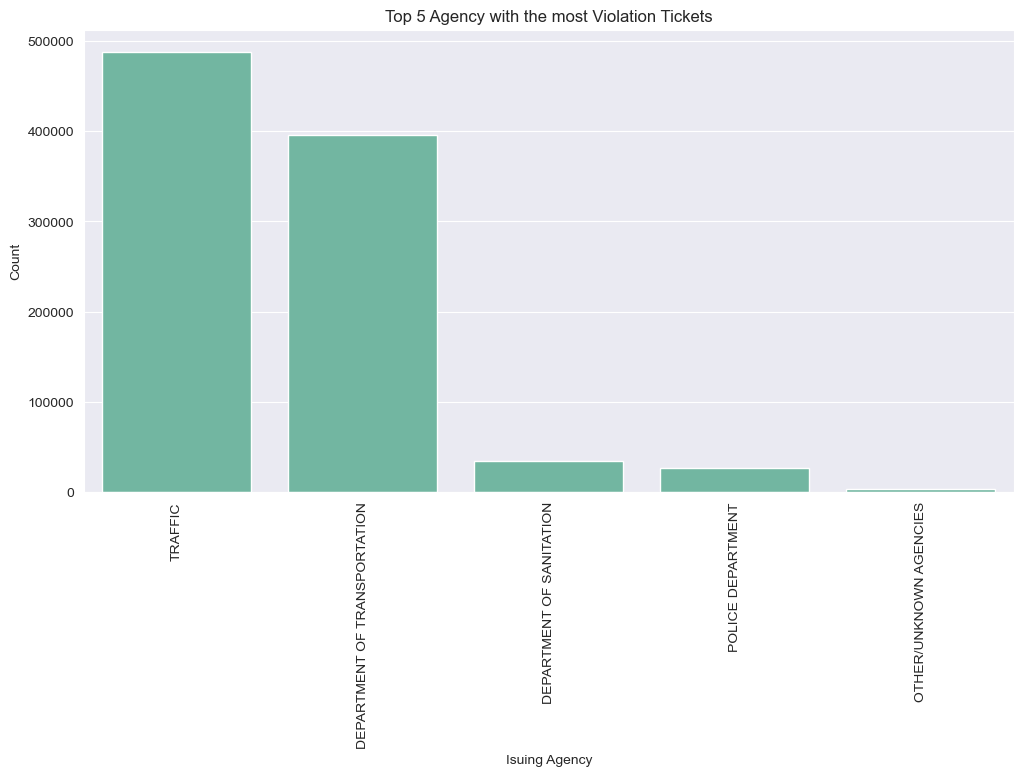

In [67]:
#Displaying issue_agency count
agency_ticket_count = df2['issuing_agency'].value_counts().reset_index()
agency_ticket_count.columns = ['issuing_agency', 'count']

#finding which name of agency gives the most tickets
violation_agency = agency_ticket_count['issuing_agency'][agency_ticket_count['count'].idxmax()]
#Ensures that the agency w/ the highest ticket would be in the first line
violation_count = agency_ticket_count ['count'].max()

top5_agency_vioaltion_tickets = agency_ticket_count.nlargest(5,'count')

#adjusting the size of the figure
plt.figure(figsize=(12,6))

#plotting the bar chart for agency_ticket_count
sns.barplot(x='issuing_agency',y='count',data = top5_agency_vioaltion_tickets)



plt.title('Top 5 Agency with the most Violation Tickets')
plt.xlabel('Isuing Agency')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.savefig('top_5_Agency_with_the_most_Violation_Tickets.png')
plt.show()


## Which day of the week has the most violations?

In [71]:
# Converting 'issue_date' to datetime format
df2['issue_date'] = pd.to_datetime(df2['issue_date'], format='%m/%d/%Y', errors='coerce')

# Extracting the day of the week
df2['day_of_week'] = df2['issue_date'].dt.day_name()

# Converting categorical columns to catergorical values
df2['registration_state'] = df2['registration_state'].astype('category')
df2['license_type'] = df2['license_type'].astype('category')
df2['violation'] = df2['violation'].astype('category')
df2['county'] = df2['county'].astype('category')
df2['issuing_agency'] = df2['issuing_agency'].astype('category')
df2['day_of_week'] = df2['day_of_week'].astype('category')

# Converting fine amount, penalty amount and interest to numeric values
df2['fine_amount'] = pd.to_numeric(df2['fine_amount'])
df2['penalty_amount'] = pd.to_numeric(df2['penalty_amount'])
df2['interest_amount'] = pd.to_numeric(df2['interest_amount'])

# Grouping by day of the week and count
violations_by_day_type = df2.groupby(['day_of_week', 'violation']).size().reset_index(name='count')
violations_by_day_type = violations_by_day_type.sort_values(by=['day_of_week', 'count'], ascending=False)

# Show value count of violation per week
violations_by_day = df2['day_of_week'].value_counts()

# Display grouped results
print("\nViolations by Day of the Week:")
print(violations_by_day)
df2.info()


Violations by Day of the Week:
day_of_week
Thursday     169481
Friday       166554
Tuesday      162918
Wednesday    158467
Monday       134512
Saturday      98602
Sunday        61226
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 951781 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   registration_state  951781 non-null  category      
 1   license_type        951781 non-null  category      
 2   summons_number      951781 non-null  int64         
 3   issue_date          951760 non-null  datetime64[ns]
 4   violation_time      951781 non-null  object        
 5   violation           951781 non-null  category      
 6   fine_amount         951781 non-null  float64       
 7   penalty_amount      951781 non-null  float64       
 8   interest_amount     951781 non-null  float64       
 9   reduction_amount    951781 non-null  float64       


/var/folders/61/5x63275967v0x49dtn1b13_r0000gn/T/ipykernel_20050/1759347658.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  violations_by_day_type = df2.groupby(['day_of_week', 'violation']).size().reset_index(name='count')


/var/folders/61/5x63275967v0x49dtn1b13_r0000gn/T/ipykernel_20050/3111922963.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_order, y=violations_by_day, palette='Greens')


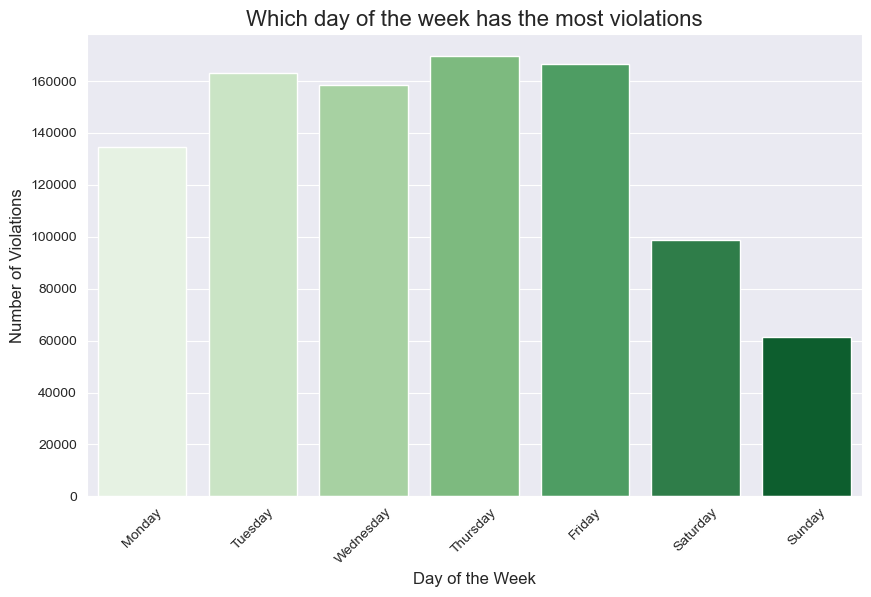

In [73]:
# Order of the days
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count violations for each day
violations_by_day = df2['day_of_week'].value_counts()

# Counts the day in order
violations_by_day = [violations_by_day.get(day, 0) for day in day_of_week_order]

# Identify the maximum count and corresponding index
max_count = max(violations_by_day)
max_index = violations_by_day.index(max_count)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_order, y=violations_by_day, palette='Greens')

# Customize
plt.title('Which day of the week has the most violations', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Violations', fontsize=12)
plt.xticks(rotation=45)

plt.show()


As seen from the breakdown, most violations occur during weekdays, with Thursday contributing the most at 169,481 violations, followed closely by Friday at 166,554. Tuesday and Wednesday also comprise a significant share, with 162,918 and 158,467 violations, respectively. Together, these four weekdays account for the majority of violations. This indicates that enforcement or traffic activity is significantly higher during the workweek. 

As for days with fewer violations, Monday, Saturday, and Sunday collectively account for a smaller share, with Monday: 134,512 violations Saturday: 98,602 violations Sunday: 61,226 violations. Sunday's violations are approximately 37% lower than Saturday’s, which could be becuase usually Sundays parking is free in NYC.

In [81]:
# 9. Agency with Most Tickets
agency_ticket_count = df2['issuing_agency'].value_counts().reset_index()
agency_ticket_count.columns = ['issuing_agency', 'count']

top5_agency_violation_tickets = agency_ticket_count.nlargest(5, 'count')

# Now you can save it
top5_agency_violation_tickets.to_csv('top5_agency_violation_tickets.csv', index=False)

In [93]:
# 10. Violations by Day of the Week
violations_by_day = df2['day_of_week'].value_counts()
violations_by_day.to_frame(name='count').to_csv('violations_by_day.csv')

# 11. Day of the Week Violations (Ordered)
pd.DataFrame({'day_of_week': day_of_week_order, 'count': violations_by_day_ordered}).to_csv('violations_by_day_ordered.csv', index=False)

NameError: name 'violations_by_day_ordered' is not defined

In [95]:
# 1. License Type With Most Tickets
df2_license_grouped.to_csv('license_type_with_most_tickets.csv', index=False)

# 2. Top 5 Violations Pie Chart
violation_5_counts.to_frame(name='count').to_csv('top_5_violations_pie_chart.csv')

# 3. Top 5 Violations vs Fine Amounts
top_5_violations.to_csv('top_5_violations_vs_fine_amounts.csv', index=False)

# 4. Top 5 Violations per Top 5 License Types
top_violations_per_license.to_csv('top_violations_per_license.csv', index=False)

# 5. Fine Amounts Heatmap
heatmap_data.to_csv('fine_amounts_heatmap_data.csv')

# 6. County with Most Tickets
ticket_count.to_csv('county_with_most_tickets.csv', index=False)

# 7. Fine Amount by County
df2[['county', 'fine_amount']].to_csv('fine_amount_by_county.csv', index=False)

# 8. Issuing Agency Pie Chart
issuing_agency_count.to_frame(name='count').to_csv('issuing_agency_count.csv')

# 9. Agency with Most Tickets
top5_agency_violation_tickets.to_csv('top5_agency_violation_tickets.csv', index=False)

# 10. Violations by Day of the Week
violations_by_day.to_frame(name='count').to_csv('violations_by_day.csv')

# 11. Day of the Week Violations (Ordered)
pd.DataFrame({'day_of_week': day_of_week_order, 'count': violations_by_day_ordered}).to_csv('violations_by_day_ordered.csv', index=False)

NameError: name 'violations_by_day_ordered' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a071433-7a06-481c-93bd-42e9e3f4bb97' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>